In [ ]:
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import iqr
from sklearn.linear_model import SGDRegressor

Import Training Module

In [ ]:
path = '/content/drive/MyDrive/data/house-prices-advanced-regression-techniques/train.csv'

In [ ]:
df = pd.read_csv(path)

In [ ]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [ ]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [ ]:
print(df.columns.tolist())

['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC'

In [ ]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [ ]:
df.corr()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


In [ ]:
df.corr()['YearBuilt']['SalePrice']

0.5228973328794967

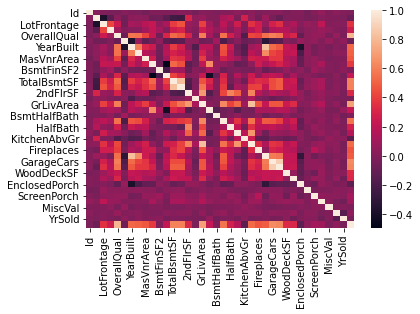

In [ ]:
sns.heatmap(df.corr())

In [ ]:
df['SaleCondition']

0        Normal
1        Normal
2        Normal
3       Abnorml
4        Normal
         ...   
1455     Normal
1456     Normal
1457     Normal
1458     Normal
1459     Normal
Name: SaleCondition, Length: 1460, dtype: object

In [ ]:
df['SaleCondition'].unique()

array(['Normal', 'Abnorml', 'Partial', 'AdjLand', 'Alloca', 'Family'],
      dtype=object)

In [ ]:
# This is a Nominal dataset (string) ; we need to convert it into dummy variables
# Need to change to Ordinal (interger value)
# One Hot Encoding

df['KitchenQual'].unique()

array(['Gd', 'TA', 'Ex', 'Fa'], dtype=object)

KitchenQual: Kitchen quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor

In [ ]:
# Turn series into array for easier OneHotEncoding

kitchenQ_column_as_array = np.array(df['KitchenQual'])

In [ ]:
kitchenQ_column_as_array

array(['Gd', 'TA', 'Gd', ..., 'Gd', 'Gd', 'TA'], dtype=object)

In [ ]:
# Reshape
kitchenQ_column_as_array = kitchenQ_column_as_array.reshape(-1, 1)
kitchenQ_column_as_array

array([['Gd'],
       ['TA'],
       ['Gd'],
       ...,
       ['Gd'],
       ['Gd'],
       ['TA']], dtype=object)

In [ ]:
enc = OneHotEncoder(handle_unknown='ignore', sparse=False)

# Pass column into
enc.fit(kitchenQ_column_as_array)

OneHotEncoder(handle_unknown='ignore', sparse=False)

In [ ]:
# Note this is a nested array, so we have to unpack woth [0]
enc.categories_[0]

array(['Ex', 'Fa', 'Gd', 'TA'], dtype=object)

In [ ]:
# Insert the values & transform them
one_hot_encoded_kitchenQ = enc.transform(kitchenQ_column_as_array)

one_hot_encoded_kitchenQ

array([[0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

In [ ]:
kitchenQ_one_hot = pd.DataFrame(data=one_hot_encoded_kitchenQ, columns=enc.categories_[0])

kitchenQ_one_hot

,Ex,Fa,Gd,TA
0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0
2,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0
...,...,...,...,...
1455,0.0,0.0,0.0,1.0
1456,0.0,0.0,0.0,1.0
1457,0.0,0.0,1.0,0.0
1458,0.0,0.0,1.0,0.0


In [ ]:
#add sale price column so we can better look at the correlation before model

kitchenQ_one_hot['SalePrice'] = df['SalePrice']
kitchenQ_one_hot.corr()['SalePrice']

Ex           0.504094
Fa          -0.157199
Gd           0.321641
TA          -0.519298
SalePrice    1.000000
Name: SalePrice, dtype: float64

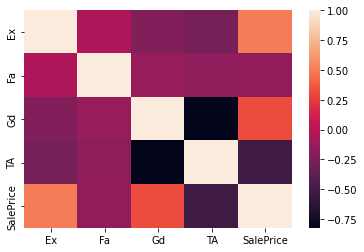

In [ ]:
sns.heatmap(kitchenQ_one_hot.corr())

In [ ]:
from sklearn import linear_model

reg = linear_model.LinearRegression()
# reg.fit(x features, y expected) - we cut out the y component in x
reg.fit(kitchenQ_one_hot.drop(labels='SalePrice', axis=1).values, kitchenQ_one_hot['SalePrice'])


reg.score(kitchenQ_one_hot.drop(labels='SalePrice', axis=1).values, kitchenQ_one_hot['SalePrice'])

0.4565978123899974

In [ ]:
enc.categories_[0].tolist()

['Ex', 'Fa', 'Gd', 'TA']

In [ ]:
def kitchenQ_dummy(kitchen_quality):
    list_of_kitchenQ = enc.categories_[0].tolist()
    # Return the integer value of the index
    index_of_kitchenQ = list_of_kitchenQ.index(kitchen_quality)

    array_to_return = []
    for i in range(0, 4):
        if i == list_of_kitchenQ:
            array_to_return.append(1)
        else:
            array_to_return.append(0)
    return np.array(array_to_return).reshape((1, -1))

In [ ]:
kitchenQ_dummy('Gd')

array([[0, 0, 0, 0]])

In [ ]:
reg.predict(kitchenQ_dummy('Gd'))

array([2.96364345e+16])

In [ ]:
reg.predict(kitchenQ_dummy('Ex'))

array([2.96364345e+16])

# Add more to our predictor model
# Add KitchenQualrea
# Using Sales Condition
# Use .copy() to unlink the DataFrame so we set the link equal to the copy of the DF


In [ ]:
#count values in data frame
#
df['SaleCondition'].value_counts()

Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64

In [ ]:
# Need to change to Ordinal in order to better work with

saleCondtion_ordinal_vlaues = {'SaleCondition': {'Normal' : 1, 'Partial': 2, 'Abnorml': 3, 'Family': 4,
                         'Alloca':5, 'AdjLand': 6}}

In [ ]:
#replace df with sale condtion with ordinal values
object_df = df.replace(saleCondtion_ordinal_vlaues)

In [ ]:
object_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,1,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,1,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,1,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,3,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,1,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,1,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,1,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,1,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,1,142125


In [ ]:
kithenQ_saleCondtion_one_hot = kitchenQ_one_hot.copy()

kithenQ_saleCondtion_one_hot['SaleCondition'] = object_df['SaleCondition']

kithenQ_saleCondtion_one_hot

,Ex,Fa,Gd,TA,SalePrice,SaleCondition
0,0.0,0.0,1.0,0.0,208500,1
1,0.0,0.0,0.0,1.0,181500,1
2,0.0,0.0,1.0,0.0,223500,1
3,0.0,0.0,1.0,0.0,140000,3
4,0.0,0.0,1.0,0.0,250000,1
...,...,...,...,...,...,...
1455,0.0,0.0,0.0,1.0,175000,1
1456,0.0,0.0,0.0,1.0,210000,1
1457,0.0,0.0,1.0,0.0,266500,1
1458,0.0,0.0,1.0,0.0,142125,1


In [ ]:
 #unfortunatly not a strong corralation


 kithenQ_saleCondtion_one_hot.corr()['SaleCondition']['SalePrice']

0.004590618820203282

In [ ]:
#drop SaleCondition due to weak corralation
kithenQ_saleCondtion_one_hot.drop('SaleCondition', axis=1, inplace= True)
kithenQ_saleCondtion_one_hot

,Ex,Fa,Gd,TA,SalePrice
0,0.0,0.0,1.0,0.0,208500
1,0.0,0.0,0.0,1.0,181500
2,0.0,0.0,1.0,0.0,223500
3,0.0,0.0,1.0,0.0,140000
4,0.0,0.0,1.0,0.0,250000
...,...,...,...,...,...
1455,0.0,0.0,0.0,1.0,175000
1456,0.0,0.0,0.0,1.0,210000
1457,0.0,0.0,1.0,0.0,266500
1458,0.0,0.0,1.0,0.0,142125


Change of plans will compare month sold instead of SaleCondition because of the better corralation which should help with our predictive model

In [ ]:
df.corr()['SalePrice']['MoSold']

0.046432245223819446

In [ ]:
kithenQ_monthS =  kithenQ_saleCondtion_one_hot.copy()

kithenQ_monthS['MoSold'] = object_df['MoSold']

kithenQ_monthS

,Ex,Fa,Gd,TA,SalePrice,MoSold
0,0.0,0.0,1.0,0.0,208500,2
1,0.0,0.0,0.0,1.0,181500,5
2,0.0,0.0,1.0,0.0,223500,9
3,0.0,0.0,1.0,0.0,140000,2
4,0.0,0.0,1.0,0.0,250000,12
...,...,...,...,...,...,...
1455,0.0,0.0,0.0,1.0,175000,8
1456,0.0,0.0,0.0,1.0,210000,2
1457,0.0,0.0,1.0,0.0,266500,5
1458,0.0,0.0,1.0,0.0,142125,4


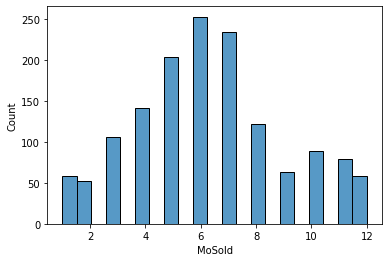

In [ ]:
sns.histplot(data=kithenQ_monthS['MoSold'])

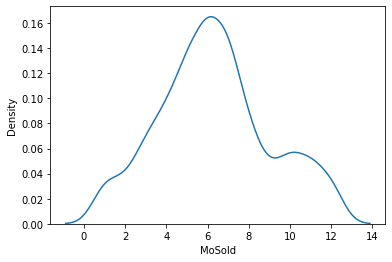

In [ ]:
sns.kdeplot(data= kithenQ_monthS['MoSold'])
#right skewed

Looking out the histogram there is one outlier that may heavily skewed our predictive model at 300

In [ ]:
#remove outlier at 300

#less_outleier = kithenQ_lotFrontage_one_hot.loc[kithenQ_lotFrontage_one_hot['LotFrontage']<200]

In [ ]:
log_transformated_data = np.log(kithenQ_monthS['MoSold'])

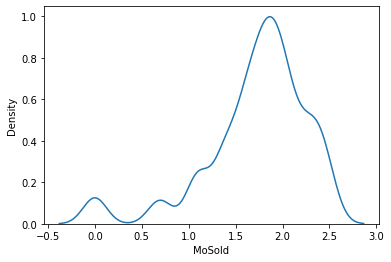

In [ ]:
#log transform forces the normal distribution
#but doesnt retain distance between points
#In this case it made it wrost
sns.kdeplot(data = log_transformated_data)

In [ ]:
#from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression


In [ ]:
#scaler = MinMaxScaler()
#scaler.fit(np.array(kithenQ_monthS['MoSold']).reshape(-1,1))
#scaled_data = scaler.transform(np.array(kithenQ_monthS['MoSold']).reshape(-1,1))


In [ ]:
#kithenQ_monthS.drop('MoSold', axis=1, inplace=True)
#kithenQ_monthS['MoSold']=scaled_data

In [ ]:
data_as_array = np.array(kithenQ_monthS['MoSold'].copy())

In [ ]:
kithenQ_monthS

,Ex,Fa,Gd,TA,SalePrice,MoSold
0,0.0,0.0,1.0,0.0,208500,2
1,0.0,0.0,0.0,1.0,181500,5
2,0.0,0.0,1.0,0.0,223500,9
3,0.0,0.0,1.0,0.0,140000,2
4,0.0,0.0,1.0,0.0,250000,12
...,...,...,...,...,...,...
1455,0.0,0.0,0.0,1.0,175000,8
1456,0.0,0.0,0.0,1.0,210000,2
1457,0.0,0.0,1.0,0.0,266500,5
1458,0.0,0.0,1.0,0.0,142125,4


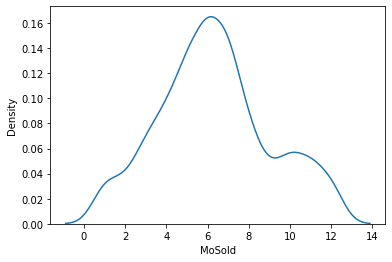

In [ ]:
sns.kdeplot(data= kithenQ_monthS['MoSold'])


In [ ]:
data_as_array = np.array(kithenQ_monthS['MoSold'].copy())

In [ ]:
data_as_array

array([2, 5, 9, ..., 5, 4, 6])

In [ ]:
Q1 = kithenQ_monthS['MoSold'].quantile(.25, interpolation='midpoint')
Q3 = kithenQ_monthS['MoSold'].quantile(.75, interpolation='midpoint')
IQR = Q3 - Q1

In [ ]:
upperlimit = Q3 + (1.5 * IQR)
lowerlimit = Q1 - (1.5 * IQR)

In [ ]:
filtered_df = kithenQ_monthS.loc[(kithenQ_monthS['MoSold'] > lowerlimit) & (kithenQ_monthS['MoSold'] < upperlimit)]

In [ ]:
filtered_df

,Ex,Fa,Gd,TA,SalePrice,MoSold
0,0.0,0.0,1.0,0.0,208500,2
1,0.0,0.0,0.0,1.0,181500,5
2,0.0,0.0,1.0,0.0,223500,9
3,0.0,0.0,1.0,0.0,140000,2
4,0.0,0.0,1.0,0.0,250000,12
...,...,...,...,...,...,...
1455,0.0,0.0,0.0,1.0,175000,8
1456,0.0,0.0,0.0,1.0,210000,2
1457,0.0,0.0,1.0,0.0,266500,5
1458,0.0,0.0,1.0,0.0,142125,4


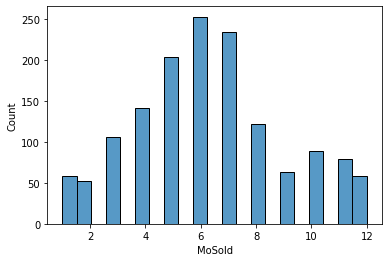

In [ ]:
sns.histplot(data=filtered_df['MoSold'])

In [ ]:
from sklearn.linear_model import LinearRegression


In [ ]:
kithenQ_monthS.drop(columns=['MoSold'], inplace=True)

In [ ]:
reg = linear_model.LinearRegression()
reg.fit(kithenQ_monthS.drop(labels='SalePrice', axis=1), kithenQ_monthS['SalePrice'])

LinearRegression()

In [ ]:
reg.score(kithenQ_monthS.drop(labels='SalePrice', axis=1), kithenQ_monthS['SalePrice'])

0.4565978123899974

In [ ]:
test_df = pd.read_csv('/content/drive/MyDrive/data/house-prices-advanced-regression-techniques/test.csv')

In [ ]:
# Prepare column for OHE
column_as_array = np.array(test_df['KitchenQual'])

# Reshape column to be OHE
column_as_array = column_as_array.reshape(-1, 1)

# Initialize our encoder
enc = OneHotEncoder(handle_unknown='ignore', sparse=False)

# Fit the column
enc.fit(column_as_array)

# Transform column
test_array = enc.transform(column_as_array)

# Build out our dataframe from ohe column
KitchenQual_test = pd.DataFrame(data=test_array, columns=enc.categories_[0])

# Create new instance of the old DataFrame
kithenQ_monthS_test = KitchenQual_test.copy()

# Add the LotArea Column into the DF
kithenQ_monthS_test['MoSold'] = test_df['MoSold']


In [ ]:
predictions = reg.predict(kithenQ_monthS_test)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


ValueError: ignored

In [ ]:
kithenQ_monthS_test


,Ex,Fa,Gd,TA,NaN,MoSold
0,0.0,0.0,0.0,1.0,0.0,6
1,0.0,0.0,1.0,0.0,0.0,6
2,0.0,0.0,0.0,1.0,0.0,3
3,0.0,0.0,1.0,0.0,0.0,6
4,0.0,0.0,1.0,0.0,0.0,1
...,...,...,...,...,...,...
1454,0.0,0.0,0.0,1.0,0.0,6
1455,0.0,0.0,0.0,1.0,0.0,4
1456,0.0,0.0,0.0,1.0,0.0,9
1457,0.0,0.0,0.0,1.0,0.0,7


In [ ]:
kithenQ_monthS

,Ex,Fa,Gd,TA,SalePrice,MoSold
0,0.0,0.0,1.0,0.0,208500,2
1,0.0,0.0,0.0,1.0,181500,5
2,0.0,0.0,1.0,0.0,223500,9
3,0.0,0.0,1.0,0.0,140000,2
4,0.0,0.0,1.0,0.0,250000,12
...,...,...,...,...,...,...
1455,0.0,0.0,0.0,1.0,175000,8
1456,0.0,0.0,0.0,1.0,210000,2
1457,0.0,0.0,1.0,0.0,266500,5
1458,0.0,0.0,1.0,0.0,142125,4
